# **Лабораторная работа №11 по вычислительной математикe.**

## Работу выполнил: Шурыгин Антон, Б01 - 909.

### **Решение уравнения теплопроводности**

#### В общем виде одномерное уравнение параболическое уравнение с граничными условиями первого рода и начальными условиями задается системой:

$$
\begin{equation*}
 \begin{cases}
    \frac{\partial u}{\partial t} = \frac{\partial}{\partial x}( u \cdot \frac{\partial u}{\partial x}) , \:\:\: 0 \leq t \leq 1, \:\:\: 0 < x < 1
    \\
    u(x, 0) = \varphi(x), \:\:\: 0 < x < X
    \\
    u(0, t) = \psi_{0}(t), \:\:\: 0 < t \leq T
    \\
    u(X, t) = \psi_{X}(t), \:\:\: 0 < t \leq T
 \end{cases}
\end{equation*}
$$

Данную задачу называют так же первой начально-краевой задачей для уравнения теплопроводности.

#### Преобразуем одномерное параболическое урпвнение:

$$
\begin{equation*}
    \frac{\partial u}{\partial t} = \frac{\partial^{2} u}{\partial x^{2}} + \frac{\partial u}{\partial x}
\end{equation*}
$$

#### Нанесем на пространственно-временную область $0 \leq x \leq X, 0 \leq t \leq T$ конечно-разностную сетку $\omega_{h \tau}$:

$$
\begin{equation*}
    \omega_{h \tau}=\left\{x_m = mh, \: m = \overline{0, M}; \:\:\: t^{k}=k\tau, k = \overline{0, K} \right\}
\end{equation*}
$$

Аппроксмириуем дифференциальные операторы отношением конечых разностей:

$$
\begin{gathered}
\left.\frac{\partial u}{\partial t}\right|_{m} ^{k}=\frac{u_{m}^{k+1}-u_{m}^{k}}{\tau}+O(\tau) \\
\left.\frac{\partial^{2} u}{\partial x^{2}}\right|_{m} ^{k}=\frac{u_{m+1}^{k}-2 u_{m}^{k}+u_{m-1}^{k}}{h^{2}}+O\left(h^{2}\right) .
\end{gathered}
$$

Решим задачу из учебника Демченко:

$$
\begin{equation*}
 \begin{cases}
    \frac{\partial u}{\partial t} = \frac{\partial}{\partial x}( u \cdot \frac{\partial u}{\partial x}) , \:\:\: 0 \leq t \leq 1, \:\:\: 0 < x < 1
    \\
    u(x, 0) = (1 + x)^{2}, \:\:\: 0 \leq x \leq 1
    \\
    u(0, t) = \frac{1}{7 - 6 \cdot t}, \:\:\: 0 < t \leq 1
    \\
    u(1, t) = \frac{4}{7 - 6 \cdot t}, \:\:\: 0 < t \leq 1
 \end{cases}
\end{equation*}
$$

In [110]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm

In [111]:
tau = 1e-4
h = 0.05

T = X = 1

x_steps = int(X / h)
t_steps = int(T / tau)

In [112]:
def phi(x):
    return (1 + x) ** 2

def psi_0(t):
    return 1 / (7 - 6*t)

def psi_X(t):
    return 4 / (7 - 6*t)

In [113]:
def solve_eq():
    data = np.zeros((t_steps, x_steps))

    for x in range(x_steps):
        data[0][x] = phi(h * x)
    
    for t in range(t_steps):
        data[t][0] = psi_0(t * tau)
        data[t][x_steps - 1] = psi_X(t * tau)

    for i in range(1, t_steps):
        for j in range(1, x_steps - 1):
            data[i][j] = tau*(data[i-1][j+1] * ((1/(h**2)) + (1/(h))) + data[i-1][j] * (1/tau - 2/(h**2) - 1/(h)) + data[i-1][j-1] * 1/(h**2))
    
    return data

def plot(u):
    x = np.arange(start=0, stop=X, step=h)
    t = np.arange(start=0, stop=T, step=tau)

    print(len(x))
    print(len(t))
    print(u.shape[0])
    print(u.shape[1])

    x, t = np.meshgrid(x, t)

    fig = plt.figure(figsize=(16, 16))
    graph = plt.axes(projection='3d')

    surf = graph.plot_surface(x, t, u, cmap=cm.plasma)
    graph.set_xlabel("x", fontsize=20)
    graph.set_ylabel("t", fontsize=20)

    graph.set_zlabel("u(x, t)", fontsize=20)

    fig.colorbar(surf, shrink=0.5)

    plt.grid()
    plt.show()

20
10000
10000
20


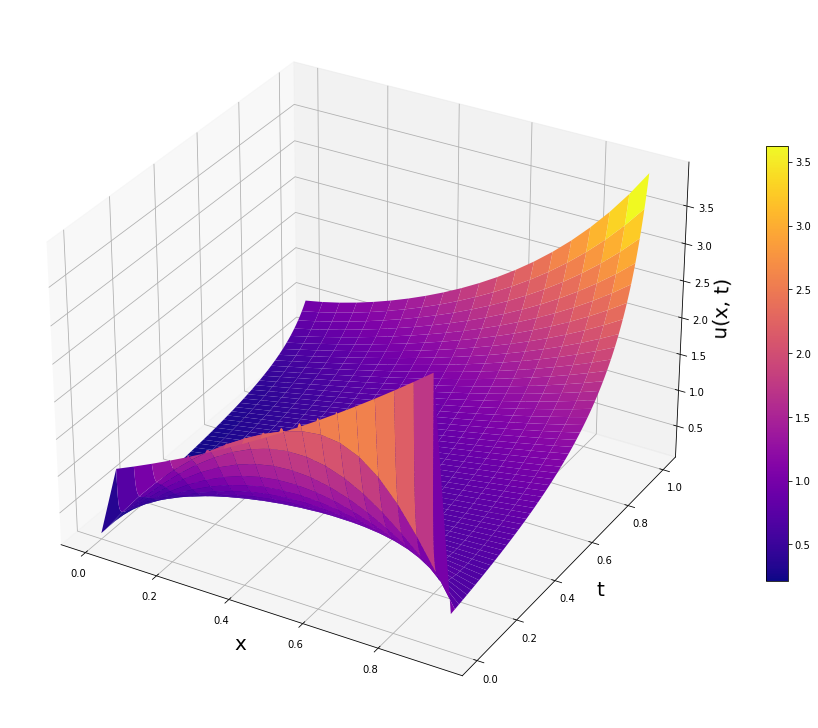

In [114]:
plot(solve_eq())